In [30]:
import pandas as pd

df = pd.read_csv("54801806-d548-4477-9d93-2036f7910b2f.csv", delimiter=";")
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,2,0,ROSES,14421,30,14420.0,42.0,NaN,NaN,14422,72,NaN,NaN,NaN,NaN,14421.5,0.000000
1,2,0,STRAWBERRIES,4036,181,NaN,NaN,NaN,NaN,4037,181,NaN,NaN,NaN,NaN,4036.5,0.000000
2,2,0,AMETHYSTS,9996,2,9995.0,25.0,NaN,NaN,10004,2,10005.0,25.0,NaN,NaN,10000.0,0.000000
3,2,0,ORCHIDS,1053,7,1052.0,2.0,1046.0,46.0,1059,7,1060.0,2.0,1067.0,46.0,1056.0,0.000000
4,2,0,STARFRUIT,5023,1,5022.0,27.0,NaN,NaN,5029,27,NaN,NaN,NaN,NaN,5026.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2,99900,AMETHYSTS,9998,3,9996.0,1.0,9995.0,20.0,10004,1,10005.0,20.0,NaN,NaN,10001.0,1607.000000
6996,2,99900,STRAWBERRIES,4042,274,NaN,NaN,NaN,NaN,4044,274,NaN,NaN,NaN,NaN,4043.0,0.000000
6997,2,99900,STARFRUIT,5011,7,5010.0,21.0,NaN,NaN,5017,21,NaN,NaN,NaN,NaN,5014.0,982.707031
6998,2,99900,ROSES,14405,64,NaN,NaN,NaN,NaN,14407,64,NaN,NaN,NaN,NaN,14406.0,0.000000


In [31]:
columns_to_keep = [col for col in df.columns if col not in ['product', 'timestamp']]

# Pivot the DataFrame
df_pivoted = df.pivot_table(index='timestamp', columns='product', values=columns_to_keep, aggfunc='mean')

# Combine the level names with the product names
df_pivoted.columns = ['_'.join(col).strip() for col in df_pivoted.columns.values]

# Reset the index if you want 'timestamp' back as a column
df_pivoted.reset_index(inplace=True)

# Display the head of the pivoted DataFrame
df_pivoted

,timestamp,ask_price_1_AMETHYSTS,ask_price_1_CHOCOLATE,ask_price_1_GIFT_BASKET,ask_price_1_ORCHIDS,ask_price_1_ROSES,ask_price_1_STARFRUIT,ask_price_1_STRAWBERRIES,ask_price_2_AMETHYSTS,ask_price_2_CHOCOLATE,...,mid_price_ROSES,mid_price_STARFRUIT,mid_price_STRAWBERRIES,profit_and_loss_AMETHYSTS,profit_and_loss_CHOCOLATE,profit_and_loss_GIFT_BASKET,profit_and_loss_ORCHIDS,profit_and_loss_ROSES,profit_and_loss_STARFRUIT,profit_and_loss_STRAWBERRIES
0,0,10004.0,7890.0,70604.0,1059.0,14422.0,5029.0,4037.0,10005.0,NaN,...,14421.5,5026.0,4036.5,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
1,100,9998.0,7890.0,70621.0,1058.0,14425.0,5029.0,4037.0,10004.0,7891.0,...,14424.0,5028.0,4036.5,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
2,200,10005.0,7891.0,70624.0,1058.0,14423.0,5028.0,4038.0,NaN,NaN,...,14422.5,5024.5,4037.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
3,300,10004.0,7891.0,70621.0,1059.0,14422.0,5029.0,4038.0,10005.0,NaN,...,14421.5,5025.5,4037.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
4,400,10005.0,7891.0,70636.0,1060.0,14423.0,5028.0,4038.0,NaN,NaN,...,14422.0,5025.0,4037.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99500,10005.0,7898.0,70715.0,1052.0,14403.0,5017.0,4044.0,NaN,7899.0,...,14402.0,5013.5,4043.5,1607.0,0.0,30235.0,10517.90625,0.0,978.460938,0.0
996,99600,10004.0,7900.0,70723.0,1055.0,14404.0,5017.0,4044.0,10005.0,NaN,...,14403.0,5013.5,4043.5,1607.0,0.0,29669.5,10517.90625,0.0,978.429688,0.0
997,99700,10005.0,7899.0,70726.0,1055.0,14403.0,5011.0,4044.0,NaN,NaN,...,14402.5,5010.5,4043.5,1607.0,0.0,29545.5,10517.90625,0.0,976.273438,0.0
998,99800,9998.0,7899.0,70729.0,1055.0,14403.0,5015.0,4044.0,10004.0,7900.0,...,14402.0,5013.0,4043.5,1607.0,0.0,29333.5,10517.90625,0.0,979.195312,0.0


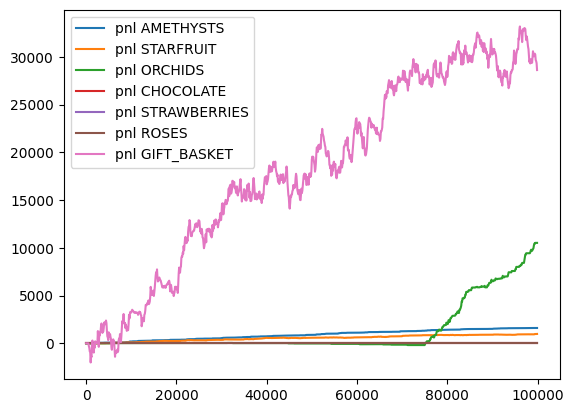

In [32]:
import matplotlib.pyplot as plt
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_AMETHYSTS'], label='pnl AMETHYSTS')
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_STARFRUIT'], label='pnl STARFRUIT')
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_ORCHIDS'], label='pnl ORCHIDS')
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_CHOCOLATE'], label='pnl CHOCOLATE')
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_STRAWBERRIES'], label='pnl STRAWBERRIES')
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_ROSES'], label='pnl ROSES')
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_GIFT_BASKET'], label='pnl GIFT_BASKET')
plt.legend()

In [33]:
pnl_amethysts = df_pivoted["profit_and_loss_AMETHYSTS"].sum()
pnl_starfruit = df_pivoted["profit_and_loss_STARFRUIT"].sum()
pnl_orchids = df_pivoted["profit_and_loss_ORCHIDS"].sum()
pnl_chocolate = df_pivoted["profit_and_loss_CHOCOLATE"].sum()
pnl_strawberries = df_pivoted["profit_and_loss_STRAWBERRIES"].sum()
pnl_roses = df_pivoted["profit_and_loss_ROSES"].sum()
pnl_gift_basket = df_pivoted["profit_and_loss_GIFT_BASKET"].sum()
print(f"amethysts profit: {pnl_amethysts}")
print(f"starfruit profit: {pnl_starfruit}")
print(f"orchids profit: {pnl_orchids}")
print(f"chocolate profit: {pnl_chocolate}")
print(f"strawberries profit: {pnl_strawberries}")
print(f"roses profit: {pnl_roses}")
print(f"gift basket profit: {pnl_gift_basket}")

amethysts profit: 888490.0
starfruit profit: 547272.3837890625
orchids profit: 1321835.2004394531
chocolate profit: 0.0
strawberries profit: 0.0
roses profit: 0.0
gift basket profit: 18155444.625


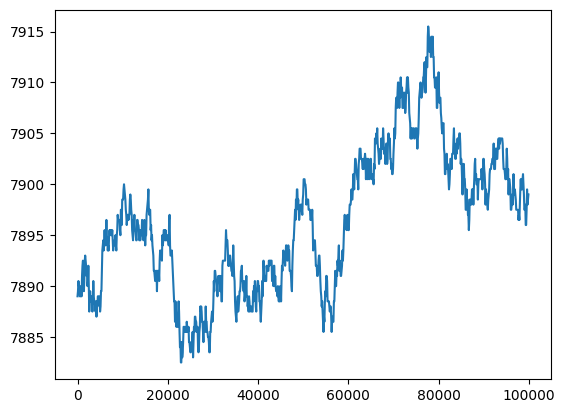

In [24]:
plt.plot(df_pivoted['timestamp'], df_pivoted['mid_price_CHOCOLATE'], label='CHOCOLATE')

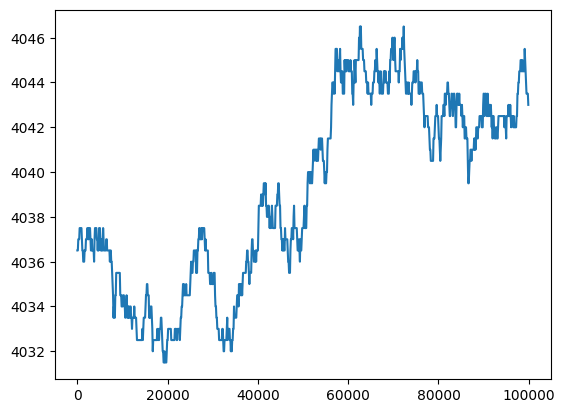

In [25]:
plt.plot(df_pivoted['timestamp'], df_pivoted['mid_price_STRAWBERRIES'], label='STRAWBERRIES')

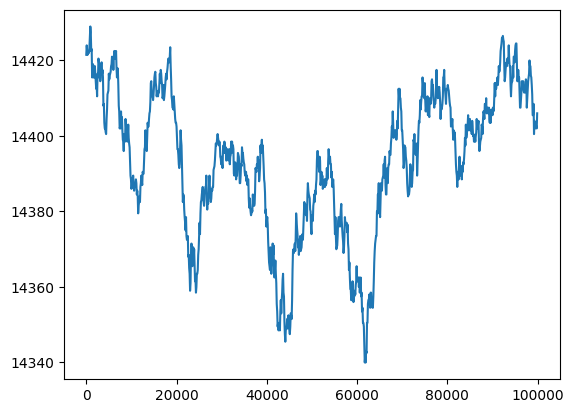

In [26]:
plt.plot(df_pivoted['timestamp'], df_pivoted['mid_price_ROSES'], label='ROSES')

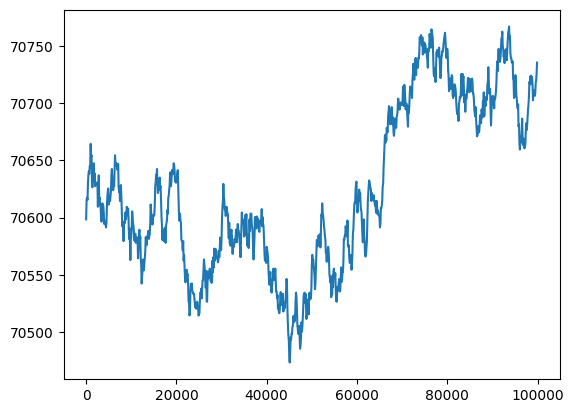

In [27]:
plt.plot(df_pivoted['timestamp'], df_pivoted['mid_price_GIFT_BASKET'], label='GIFT BASKET')

In [28]:
corr_cols = ["mid_price_CHOCOLATE", "mid_price_STRAWBERRIES", "mid_price_ROSES", "mid_price_GIFT_BASKET"]
corr_matrix = df_pivoted[corr_cols].corr()
corr_matrix

,mid_price_CHOCOLATE,mid_price_STRAWBERRIES,mid_price_ROSES,mid_price_GIFT_BASKET
mid_price_CHOCOLATE,1.000000,0.630684,0.307079,0.789373
mid_price_STRAWBERRIES,0.630684,1.000000,-0.023705,0.576325
mid_price_ROSES,0.307079,-0.023705,1.000000,0.657614
mid_price_GIFT_BASKET,0.789373,0.576325,0.657614,1.000000


411.9 33.389996883675984


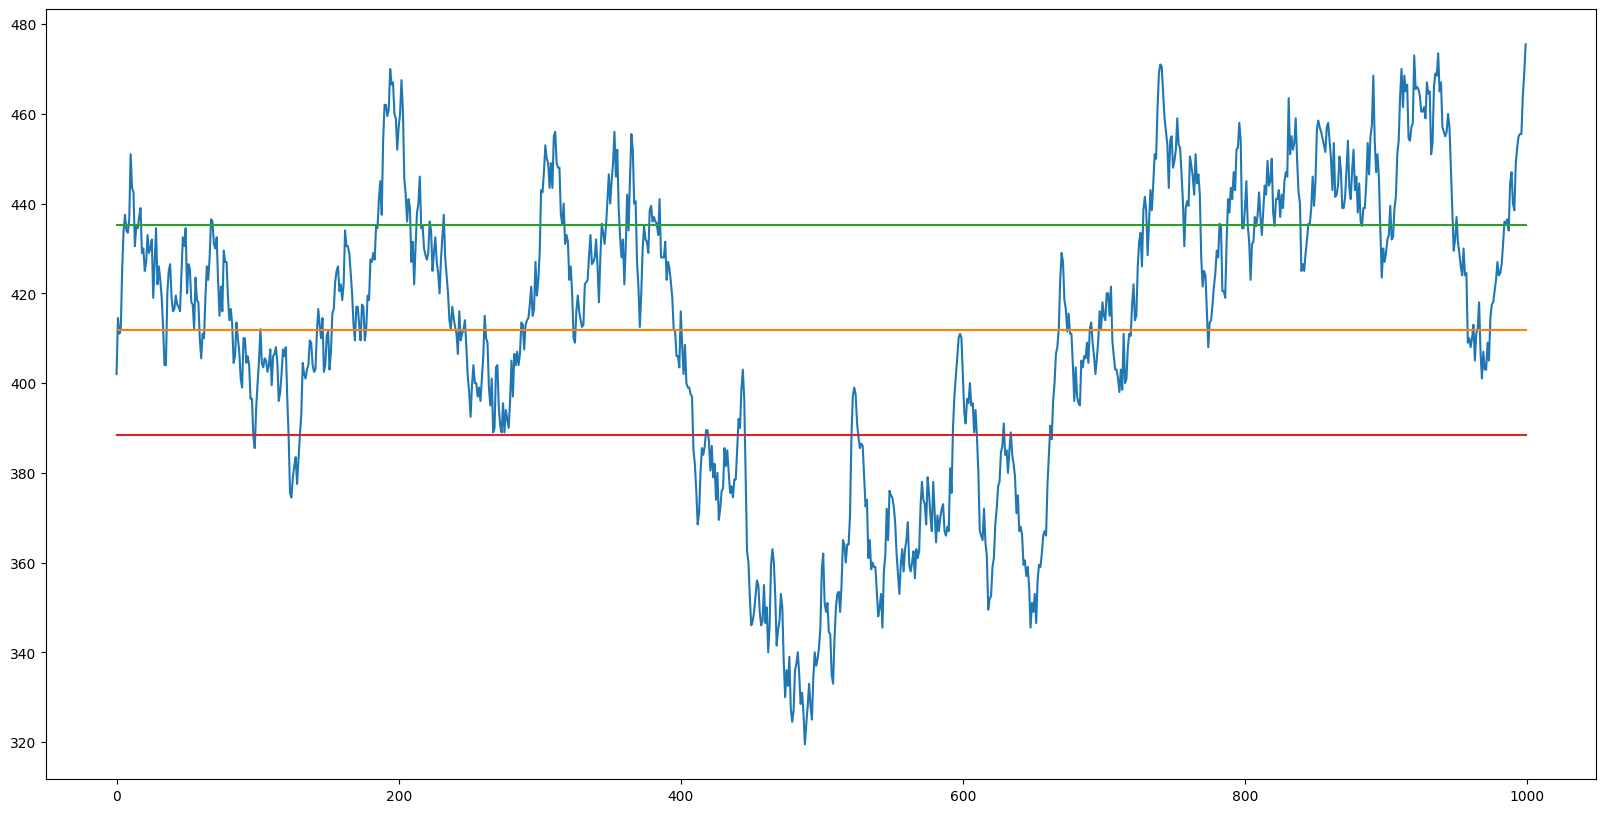

In [29]:
import statistics
size = 1000

basket_midprices = df_pivoted['mid_price_GIFT_BASKET'].to_list()[0:size]
straw_midprices = df_pivoted['mid_price_STRAWBERRIES'].to_list()[0:size]
choco_midprices = df_pivoted['mid_price_CHOCOLATE'].to_list()[0:size]
roses_midprices = df_pivoted['mid_price_ROSES'].to_list()[0:size]

difference = []

times = [i for i in range(size)]

for i in range(len(basket_midprices)):
    diff = basket_midprices[i] - 6*straw_midprices[i] - 4*choco_midprices[i] - roses_midprices[i]
    difference.append(diff)

mean, std = statistics.mean(difference), statistics.stdev(difference)
print(mean, std)